In [1]:
# https://docs.xarray.dev/en/latest/getting-started-guide/quick-overview.html
# useful notes from Jack at OCF https://github.com/openclimatefix/Satip/blob/main/notebooks/load_and_plot_HRV_UK_Zarr_from_GCS.ipynb

import numpy as np
import pandas as pd
import xarray as xr
from datetime import datetime
import matplotlib.pyplot as plt


In [2]:
# SATELLITE_ZARR_PATH = "gs://public-datasets-eumetsat-solar-forecasting/satellite/EUMETSAT/SEVIRI_RSS/v3/eumetsat_seviri_hrv_uk.zarr"

SATELLITE_ZARR_PATH = "/home/ben/eumetsat_seviri_hrv_uk.zarr"

dataset = xr.open_dataset(
    SATELLITE_ZARR_PATH, 
    engine="zarr",
    chunks="auto",  # Load the data as a Dask array
)

print(dataset)

<xarray.Dataset>
Dimensions:  (time: 173624, y: 891, x: 1843)
Coordinates:
  * time     (time) datetime64[ns] 2020-01-01T00:05:00 ... 2021-11-07T15:50:00
  * x        (x) float32 2.8e+04 2.7e+04 2.6e+04 ... -1.813e+06 -1.814e+06
    x_osgb   (y, x) float32 dask.array<chunksize=(891, 1843), meta=np.ndarray>
  * y        (y) float32 4.198e+06 4.199e+06 4.2e+06 ... 5.087e+06 5.088e+06
    y_osgb   (y, x) float32 dask.array<chunksize=(891, 1843), meta=np.ndarray>
Data variables:
    data     (time, y, x) int16 dask.array<chunksize=(22, 891, 1843), meta=np.ndarray>


In [3]:
dataset['time']

<xarray.DataArray 'time' (time: 173624)>
array(['2020-01-01T00:05:00.000000000', '2020-01-01T00:10:00.000000000',
       '2020-01-01T00:15:00.000000000', ..., '2021-11-07T15:40:00.000000000',
       '2021-11-07T15:45:00.000000000', '2021-11-07T15:50:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2020-01-01T00:05:00 ... 2021-11-07T15:50:00

In [4]:
dataset['data']

<xarray.DataArray 'data' (time: 173624, y: 891, x: 1843)>
dask.array<open_dataset-9b053275ccdc7c4af0766e1a434aafe5data, shape=(173624, 891, 1843), dtype=int16, chunksize=(22, 891, 1843), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2020-01-01T00:05:00 ... 2021-11-07T15:50:00
  * x        (x) float32 2.8e+04 2.7e+04 2.6e+04 ... -1.813e+06 -1.814e+06
    x_osgb   (y, x) float32 dask.array<chunksize=(891, 1843), meta=np.ndarray>
  * y        (y) float32 4.198e+06 4.199e+06 4.2e+06 ... 5.087e+06 5.088e+06
    y_osgb   (y, x) float32 dask.array<chunksize=(891, 1843), meta=np.ndarray>
Attributes:
    _satpy_id:                              !!python/object/apply:satpy.datas...
    ancillary_variables:                    []
    area:                                   msg_seviri_rss_1km:\n  descriptio...
    calibration:                            reflectance
    coordinates:                            acq_time
    georef_offset_corrected:                True
    modifiers:                              []
    name:                                   HRV
    orbital_parameters:                     projection_altitude: 35785831.0\n...
    platform_name:                          Meteosat-10
    reader:                                 seviri_l1b_native
    resolution:                             1000.134348869
    sensor:                                 seviri
    standard_name:                          toa_bidirectional_reflectance
    sun_earth_distance_correction_applied:  True
    sun_earth_distance_correction_factor:   1.0282367454433767
    wavelength:                             [0.5, 0.7, 0.9, 'µm']

In [5]:
subset = (
    dataset
    # Select a time slice using 'sel' (short for 'select').
    .sel(
        time=slice(
            "2021-06-01 12:00",
            "2021-06-01 12:55",
        )
    )
)

## Creating a subset based on time

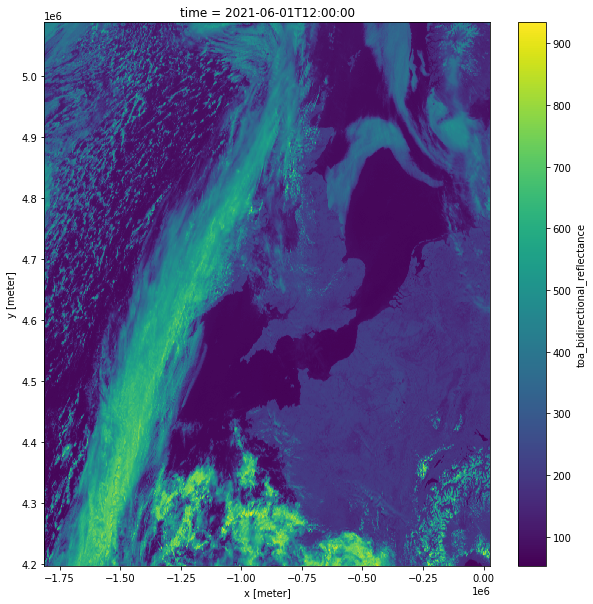

In [9]:
dataset['data'].sel(time="2021-06-01 12:00").plot(figsize=(10,10))
plt.savefig('Sat_HRV_full_plot.jpg');


In [82]:
# Cropping with a mask  https://gis.stackexchange.com/questions/353698/how-to-clip-an-xarray-to-a-smaller-extent-given-the-lat-lon-coordinates

# min_lon = 400
# max_lon = 600
# min_lat = 300
# max_lat = 700

# ds = dataset['data']

# mask_lon = (ds.x_osgb >= min_lon) & (ds.x_osgb <= max_lon)
# mask_lat = (ds.y_osgb >= min_lat) & (ds.y_osgb <= max_lat)



# cropped_ds = ds.where((mask_lat), drop=True)

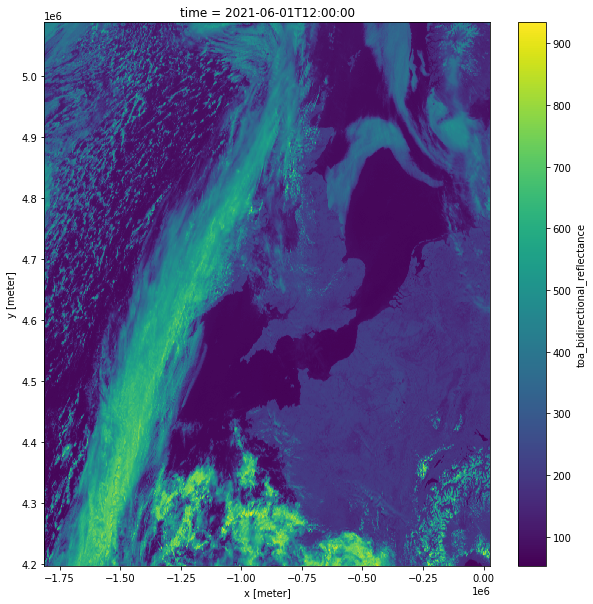

In [10]:
frame = dataset['data'].sel(time="2021-06-01 12:00")
frame.plot(figsize=(10,10))

### Crop based on coordinates 

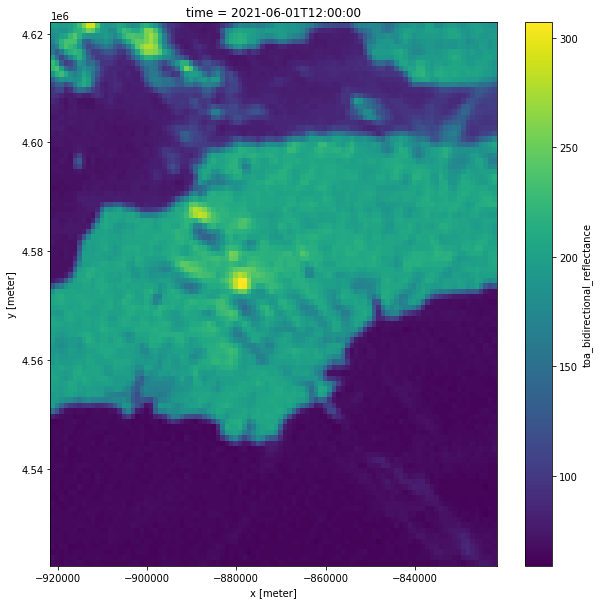

In [11]:
# time: 173624, y: 891, x: 1843)

# seems like x starts from the right
# y starts from the bottom, more normal

# devon_crop =x=slice(850,950),
#         y=slice(350,450)

crop = (
    frame
    .isel(
        x=slice(850,950),
        y=slice(325,425)
    )
)

crop.plot(figsize=(10,10))
plt.savefig('Sat_HRV_Devon.jpg')

In [109]:
devon_crop = (
    dataset
    .isel(
        x=slice(850,950),
        y=slice(325,425)
    )
)

In [112]:
devon_crop

<xarray.Dataset>
Dimensions:  (time: 173624, y: 100, x: 100)
Coordinates:
  * time     (time) datetime64[ns] 2020-01-01T00:05:00 ... 2021-11-07T15:50:00
  * x        (x) float32 -8.221e+05 -8.231e+05 ... -9.201e+05 -9.211e+05
    x_osgb   (y, x) float32 dask.array<chunksize=(100, 100), meta=np.ndarray>
  * y        (y) float32 4.523e+06 4.524e+06 4.525e+06 ... 4.621e+06 4.622e+06
    y_osgb   (y, x) float32 dask.array<chunksize=(100, 100), meta=np.ndarray>
Data variables:
    data     (time, y, x) int16 dask.array<chunksize=(22, 100, 100), meta=np.ndarray>

In [113]:
devon_crop.to_zarr("devon-crop.zarr")